# Classification

## 1. Biclustering

**A demo of the Spectral Co-clustering algorithm**

This example demostrate how to generate a dataset and bicluster it using the **Spectral Co-Clustering** algorithm.

The dataset is generated using the `make_biclusters` function, which creates a matrix of small values and implants bicluster with large values. The rows and columns are then shuffled and passed to the **Spectral Co-Clustering** algorithm. Rearranging the shuffled matrix to make biclusters contiguous shows how accurately the algorithm found the biclusters.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

In [5]:
data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5, shuffle=False, random_state=0
)

Text(0.5, 1.0, 'Original dataset')

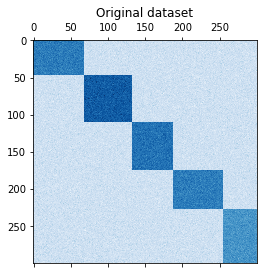

In [6]:
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

In [8]:
# shuffle clusters 
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

Text(0.5, 1.0, 'Shuffled dataset')

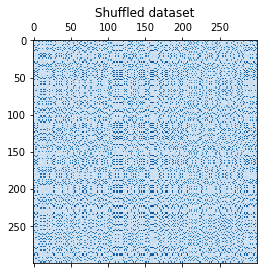

In [9]:
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

In [10]:
model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

In [11]:
print("consensus score: {:.3f}".format(score))

consensus score: 1.000


In [12]:
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

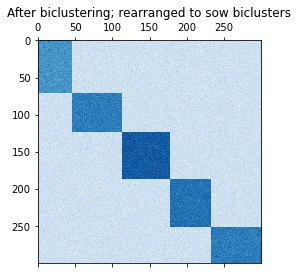

In [13]:
plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to sow biclusters")
plt.show()

**A demo of the Spectral Biclustering algorithm**

This example demostrates how to generate a checkerboard dataset and bicluster it using the Spectral Biclustering algorithm.

The data is generated with the `make_checkerboard` function, then shuffled and passed to the **Spectral Biclustering** algorithm. The rows and columns of the shuffled matrix are rearranged to show the biclustering found by the algorithm.

The outer product of the row and column label vectors shows a representation of the checkerboard structure.

In [14]:
from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering

In [15]:
n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape = (300, 300), n_clusters= n_clusters, noise = 10, shuffle = False, random_state=0
)

Text(0.5, 1.0, 'Original dataset')

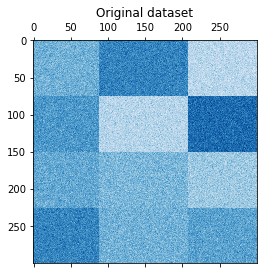

In [16]:
plt.matshow(data, cmap = plt.cm.Blues)
plt.title("Original dataset")

In [17]:
# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

Text(0.5, 1.0, 'Shuffled dataset')

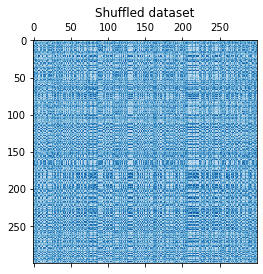

In [18]:
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

In [19]:
model = SpectralBiclustering(n_clusters = n_clusters, method="log", random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

In [20]:
print("consensus score: {:.1f}".format(score))

consensus score: 1.0


In [22]:
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

Text(0.5, 1.0, 'After biclustering; rearranged to show biclusters')

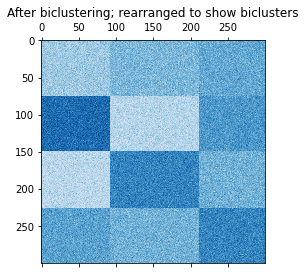

In [23]:
plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

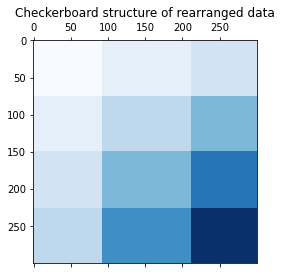

In [24]:
plt.matshow(
    np.outer(np.sort(model.row_labels_) + 1, np.sort(model.column_labels_) + 1),
    cmap = plt.cm.Blues,
)
plt.title("Checkerboard structure of rearranged data")
plt.show()